In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


In [42]:
# Load the dataset
dataset = pd.read_csv('train.csv')
dataset.head()

year  month  day  latitude  longitude  zon.winds  mer.winds  humidity  \
0  1992     12   13     -4.99      156.0        4.8       -2.8      78.5   
1  1989      5   14      0.00     -110.1       -2.5        2.4       NaN   
2  1993      6   28      2.04     -110.2       -4.5        5.9       NaN   
3  1995      1    8      1.98     -140.0       -7.7        1.2      82.6   
4  1995      2   21      5.01     -170.0       -5.4       -6.6      75.2   

   air temp.  s.s.temp.  
0      28.98      30.06  
1      24.95      25.23  
2      25.78      27.84  
3      26.47      26.86  
4      28.83      28.90

In [43]:
# Dropping unnecessary columns and filling nan
dataset = dataset.drop(['year', 'month', 'day'], axis=1)
dataset.fillna(dataset.mode(), inplace=True)
dataset.head()

latitude  longitude  zon.winds  mer.winds  humidity  air temp.  s.s.temp.
0     -4.99      156.0        4.8       -2.8      78.5      28.98      30.06
1      0.00     -110.1       -2.5        2.4       NaN      24.95      25.23
2      2.04     -110.2       -4.5        5.9       NaN      25.78      27.84
3      1.98     -140.0       -7.7        1.2      82.6      26.47      26.86
4      5.01     -170.0       -5.4       -6.6      75.2      28.83      28.90

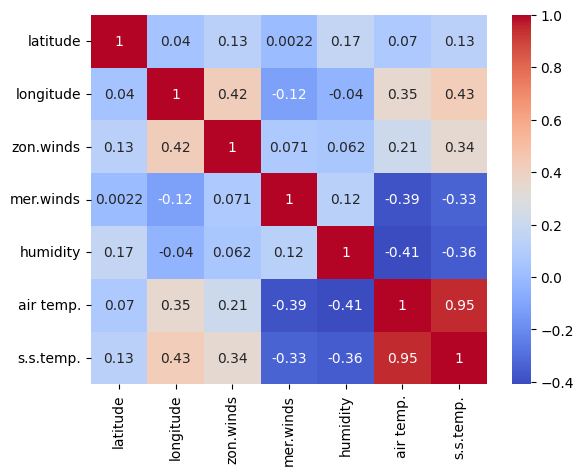

In [44]:
# Plotting correlation matrix
import seaborn as sb
dp = sb.heatmap(dataset.corr(), cmap='coolwarm', annot=True)
plt.show()

In [45]:
# Separate features (X) and target variable (y)
x = dataset[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.']]
y = dataset['s.s.temp.']


In [46]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [47]:
# Feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [48]:
# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=1)


In [49]:
# Train the model
xgb_model.fit(x_train, y_train)

# Predicting test results
y_pred = xgb_model.predict(x_test)


In [50]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.15925382152794376
R-squared: 0.9660458553375562


In [51]:
# Model score (R²)
model_score = xgb_model.score(x_test, y_test)
print(f"Model Score (R²): {model_score}")


Model Score (R²): 0.9660458553375562


In [52]:
# Results dataframe
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df)

       Actual  Predicted
52962   24.58  24.888542
33278   29.30  29.253817
97517   29.08  28.807051
50626   29.16  29.276346
29311   29.19  28.412712
...       ...        ...
20311   28.33  28.304882
46240   28.88  28.826084
79427   24.73  24.190573
27358   22.61  22.609674
42215   28.77  29.246073

[20882 rows x 2 columns]


In [53]:
# Predicting surface temperature for sample data
#sample_data = [[-4.99, 156, 4.8, -2.8, 78.5, 28.98]] 
dataset1 = pd.read_csv('data_1997_1998.csv')
dataset1 = dataset1.drop(['year', 'month', 'day'], axis=1)
dataset1.fillna(dataset1.mean(), inplace=True)
sample_data1 = dataset1.values.tolist()
print(sample_data1)
scaled_sample_data1 = sc.transform(sample_data1) 
predicted_temp1 = xgb_model.predict(scaled_sample_data1)
print("Predicted Surface Temperature")
print('='*30)
for i in range(0,len(sample_data1)):
    print(i,'      ', predicted_temp1[i])

[[0.07, -110.0, -3.1, 1.4, 89.6, 22.66], [0.07, -110.0, -2.8, 3.0, 86.8, 22.45], [0.07, -110.0, -5.2, 3.3, 85.2, 22.14], [0.07, -110.0, -5.7, 1.6, 86.8, 22.19], [0.07, -110.0, -5.1, 1.5, 83.6, 22.34], [0.08, -110.0, -3.5, 3.7, 85.2, 22.19], [0.08, -110.0, -2.8, 3.2, 85.2, 22.1], [0.08, -110.0, -2.8, 2.3, 86.0, 21.94], [0.08, -110.0, -4.6, 2.0, 82.8, 22.45], [0.08, -110.0, -5.3, 2.9, 81.2, 22.5], [0.08, -110.0, -4.4, 3.6, 82.0, 22.34], [0.08, -110.0, -3.4, 3.0, 83.2, 22.34], [0.09, -110.0, -2.0, 4.2, 85.2, 22.62], [0.09, -110.0, -3.5, 4.3, 86.0, 22.66], [0.09, -110.0, -2.8, 4.4, 88.0, 22.78], [0.08, -110.0, -1.9, 6.5, 86.4, 23.03], [0.08, -110.0, -3.1, 5.4, 85.2, 23.06], [0.08, -110.0, -3.3, 4.2, 85.2, 23.06], [0.08, -110.0, -2.7, 4.0, 82.4, 23.16], [0.08, -110.0, -1.7, 4.0, 84.0, 23.23], [0.07, -110.0, -2.2, 4.7, 84.8, 23.75], [0.07, -110.0, -2.6, 5.8, 85.6, 23.23], [0.07, -110.0, -2.3, 6.1, 83.2, 23.27], [0.07, -110.0, -0.9, 6.3, 84.8, 23.62], [0.07, -110.0, -0.9, 6.5, 83.6, 23.83], [

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Surface Temperature
0        22.71309
1        22.686415
2        22.594568
3        22.18079
4        22.498775
5        22.63832
6        22.425781
7        22.141766
8        22.796175
9        22.923553
10        22.962477
11        22.706442
12        23.06873
13        23.290844
14        23.356636
15        23.31303
16        23.607563
17        23.701405
18        23.832973
19        23.62999
20        24.072418
21        23.591496
22        23.918335
23        24.260075
24        24.435839
25        24.514753
26        25.174152
27        24.876785
28        24.756886
29        24.578596
30        24.40551
31        24.052364
32        23.821424
33        23.562763
34        23.759308
35        23.875954
36        23.75456
37        23.80892
38        23.929623
39        24.08604
40        24.272726
41        24.242785
42        24.517303
43        25.31642
44        28.126543
45        28.126543
46        28.126543
47        28.126543
48        28.126543
49        2

In [54]:
import csv
filename = 'output3.csv'
def write_numbers_to_csv(predicted_temp, filename):
    try:
        # Open the file in write mode
        with open(filename, mode='w', newline='') as file:
            writer = csv.writer(file)

            # Write each number in the list to a new row in the CSV file
            for number in predicted_temp:
                writer.writerow([number])
        
        print(f'Numbers successfully written to {filename}')
    except Exception as e:
        print(f'Error writing to CSV file: {e}')
write_numbers_to_csv(predicted_temp1, 'output1(data_1997_1998).csv')

Numbers successfully written to output1(data_1997_1998).csv


In [55]:
dataset2 = pd.read_csv('evaluation(new).csv')
dataset2 = dataset2.drop(['year', 'month', 'day'], axis=1)
dataset2.fillna(dataset2.mean(), inplace=True)
sample_data2 = dataset2.values.tolist()
print(sample_data2)
scaled_sample_data2 = sc.transform(sample_data2) 
predicted_temp2 = xgb_model.predict(scaled_sample_data2)
print("Predicted Surface Temperature")
print('='*30)
for i in range(0,len(sample_data2)):
    print(i,'      ', predicted_temp2[i])

[[2.0, 165.0, -3.3, -1.9, 79.4, 28.95], [4.99, 156.0, -3.5, -2.2, 82.0, 27.86], [-4.97, -125.0, -8.2, 1.5, 84.2, 26.02], [8.01, 165.0, -5.4, -1.0, 84.1, 28.38], [2.06, 165.0, 2.0, 0.6, 75.4, 28.47], [-0.04, -170.0, -6.2, -1.0, 75.5, 28.98], [-1.98, -155.0, -6.5, 0.4, 82.1, 27.0], [2.06, 165.0, -3.4597100802854595, 0.46327386262265835, 75.4, 29.56], [-4.99, -95.0, -4.2, 4.2, 81.0, 26.69], [-4.99, -110.0, -5.5, 1.5, 82.1, 22.94], [2.06, -155.0, -4.0, 2.7, 81.22945310113046, 26.16], [-0.02, -94.94, -2.4, 2.2, 81.22945310113046, 21.06], [8.04, -170.0, -7.1, -4.4, 77.7, 27.48], [-8.03, -109.94, -3.4597100802854595, 0.46327386262265835, 81.22945310113046, 23.33], [8.99, -140.1, 0.7, 5.8, 81.22945310113046, 26.8], [8.04, 165.1, -4.6, -6.0, 78.7, 27.62], [2.02, -110.06, -8.6, -0.6, 75.4, 26.69], [0.0, -109.56, -1.9, 3.0, 81.22945310113046, 23.25], [-4.97, -140.0, 0.6, -4.1, 79.3, 28.44], [8.99, -140.2, -1.8, -1.1, 84.4, 27.12], [2.09, 165.0, 2.0, -0.6, 83.2, 27.84], [2.07, -110.1, -1.3, 1.3, 8

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


5082        25.115307
5083        29.188122
5084        27.08048
5085        30.042902
5086        28.16385
5087        29.229845
5088        28.960863
5089        27.046621
5090        26.138027
5091        29.576443
5092        28.2513
5093        29.301722
5094        28.949427
5095        26.763777
5096        29.501945
5097        23.824177
5098        27.619856
5099        29.674562
5100        26.943556
5101        25.077349
5102        29.900183
5103        28.37183
5104        25.7361
5105        27.619114
5106        28.55577
5107        27.784698
5108        27.237873
5109        24.577032
5110        23.169355
5111        28.131987
5112        29.226074
5113        22.109108
5114        29.299847
5115        29.402311
5116        29.586115
5117        27.249311
5118        25.634996
5119        25.754076
5120        26.404917
5121        26.683725
5122        29.300539
5123        25.193089
5124        29.581982
5125        27.738146
5126        29.2186
5127        24.00708

In [56]:
import csv
filename = 'output2(evaluation).csv'
def write_numbers_to_csv(predicted_temp2, filename):
    try:
        # Open the file in write mode
        with open(filename, mode='w', newline='') as file:
            writer = csv.writer(file)

            # Write each number in the list to a new row in the CSV file
            for number in predicted_temp2:
                writer.writerow([number])
        
        print(f'predicted sea surface Temperature is successfully written to {filename}')
    except Exception as e:
        print(f'Error writing to CSV file: {e}')
write_numbers_to_csv(predicted_temp2, 'output2(evaluation).csv')

predicted sea surface Temperature is successfully written to output2(evaluation).csv


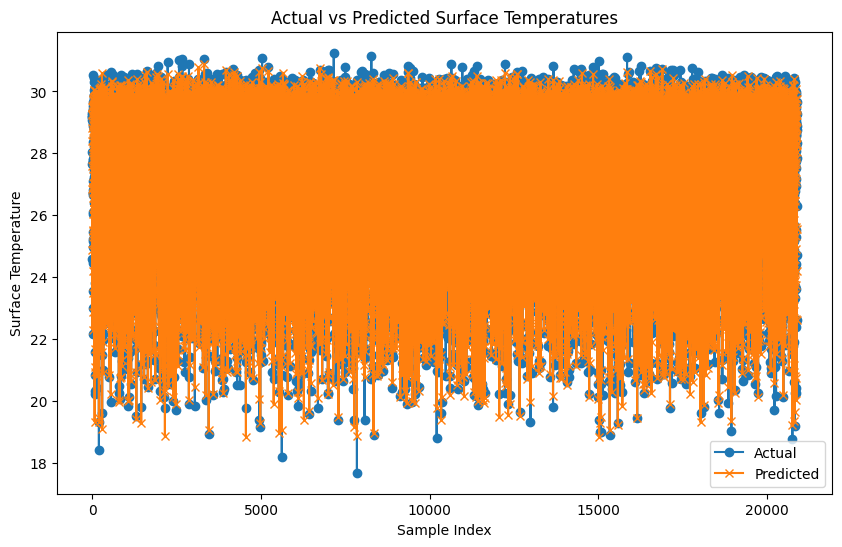

In [57]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Surface Temperatures')
plt.xlabel('Sample Index')
plt.ylabel('Surface Temperature')
plt.legend()
plt.show()